To learn more about the mentioned metrics, let’s start with a simple problem.

Suppose we
have a binary classification problem, i.e. a problem in which there are only two
targets. Let’s suppose it’s a problem of classifying chest x-ray images. There are
chest x-ray images with no problem, and some of the chest x-ray images have
collapsed lung which is also known as pneumothorax. So, our task is to build a
classifier that given a chest x-ray image can detect if it has pneumothorax.

We also assume that we have an equal number of pneumothorax and nonpneumothorax
chest x-ray images; let’s say 100 each. Thus, we have 100 positive
samples and 100 negative samples with a total of 200 images.

The first step is to divide the data described above into two equal sets of 100 images
each, i.e. training and validation set. In both the sets, we have 50 positive and 50
negative samples.

***When we have an equal number of positive and negative samples in a binary
classification metric, we generally use accuracy, precision, recall and f1.***

**Accuracy**: It is one of the most straightforward metrics used in machine learning.
It defines how accurate your model is. For the problem described above, if you
build a model that classifies 90 images accurately, your accuracy is 90% or 0.90. If
only 83 images are classified correctly, the accuracy of your model is 83% or 0.83.
Simple.

Python code for calculating accuracy is also quite simple.

In [5]:
def accuracy(y_true, y_pred):
    """
    Function to calculate accuracy
    :param y_true: list of true values
    :param y_pred: list of predicted values
    :return: accuracy score
    """
    # initialize a simple counter for correct predictions
    correct_counter = 0
    # loop over all elements of y_true
    # and y_pred "together"
    for yt, yp in zip(y_true, y_pred):
        if yt == yp:
        # if prediction is equal to truth, increase the counter
            correct_counter += 1
    # return accuracy
    # which is correct predictions over the number of samples
    return correct_counter / len(y_true)

We can also calculate accuracy using scikit-learn.

In [6]:
from sklearn import metrics
l1 = [0,1,1,1,0,0,0,1]
l2 = [0,1,0,1,0,1,0,0]
metrics.accuracy_score(l1, l2)

0.625

Now, let’s say we change the dataset a bit such that there are 180 chest x-ray images
which do not have pneumothorax and only 20 with pneumothorax. Even in this
case, we will create the training and validation sets with the same ratio of positive
to negative (pneumothorax to non- pneumothorax) targets. In each set, we have 90
non- pneumothorax and 10 pneumothorax images. If you say that all images in the
validation set are non-pneumothorax, what would your accuracy be? Let’s see; you
classified 90% of the images correctly. So, your accuracy is 90%.

But look at it one more time.

You didn’t even build a model and got an accuracy of 90%. That seems kind of
useless. If we look carefully, we will see that the dataset is skewed, i.e., the number
of samples in one class outnumber the number of samples in other class by a lot. In
these kinds of cases, it is not advisable to use accuracy as an evaluation metric as it
is not representative of the data. So, you might get high accuracy, but your model
will probably not perform that well when it comes to real-world samples, and you
won’t be able to explain to your managers why.

In these cases, it’s better to look at other metrics such as **precision**.

Before learning about precision, we need to know a few terms. Here we have
assumed that chest x-ray images with pneumothorax are positive class (1) and
without pneumothorax are negative class (0).

**True positive (TP)**: Given an image, if your model predicts the image has
pneumothorax, and the actual target for that image has pneumothorax, it is
considered a true positive.

**True negative (TN)**: Given an image, if your model predicts that the image does not
have pneumothorax and the actual target says that it is a non-pneumothorax image,
it is considered a true negative.

In simple words, **if your model correctly predicts positive class, it is true positive,
and if your model accurately predicts negative class, it is a true negative**.

**False positive (FP)**: Given an image, if your model predicts pneumothorax and the
actual target for that image is non- pneumothorax, it a false positive.

**False negative (FN)**: Given an image, if your model predicts non-pneumothorax
and the actual target for that image is pneumothorax, it is a false negative.

In simple words, **if your model incorrectly (or falsely) predicts positive class, it is
a false positive. If your model incorrectly (or falsely) predicts negative class, it is a
false negative**.

Let’s look at implementations of these, one at a time.

In [8]:
def true_positive(y_true, y_pred):
    """
    Function to calculate True Positives
    :param y_true: list of true values
    :param y_pred: list of predicted values
    :return: number of true positives
    """
    # initialize
    tp = 0
    for yt, yp in zip(y_true, y_pred):
        if yt == 1 and yp == 1:
            tp += 1
    return tp
def true_negative(y_true, y_pred):
    """
    Function to calculate True Negatives
    :param y_true: list of true values
    :param y_pred: list of predicted values
    :return: number of true negatives
    """
    # initialize
    tn = 0
    for yt, yp in zip(y_true, y_pred):
        if yt == 0 and yp == 0:
            tn += 1
    return tn
def false_positive(y_true, y_pred):
    """
    Function to calculate False Positives
    :param y_true: list of true values
    :param y_pred: list of predicted values
    :return: number of false positives
    """
    # initialize
    fp = 0
    for yt, yp in zip(y_true, y_pred):
        if yt == 0 and yp == 1:
            fp += 1
    return fp
def false_negative(y_true, y_pred):
    """
    Function to calculate False Negatives
    :param y_true: list of true values
    :param y_pred: list of predicted values
    :return: number of false negatives
    """
    # initialize
    fn = 0
    for yt, yp in zip(y_true, y_pred):
        if yt == 1 and yp == 0:
            fn += 1
    return fn

The way I have implemented these here is quite simple and works only for binary
classification. Let’s check these functions.

In [9]:
l1 = [0,1,1,1,0,0,0,1]
l2 = [0,1,0,1,0,1,0,0]

In [10]:
true_positive(l1, l2)

2

In [11]:
false_positive(l1, l2)

1

In [12]:
false_negative(l1, l2)

2

In [13]:
true_negative(l1, l2)

3

Accuracy Score = (TP + TN) / (TP + TN + FP + FN)

We can now quickly implement accuracy score using TP, TN, FP and FN in python.
Let’s call it accuracy_v2.

In [15]:
def accuracy_v2(y_true, y_pred):
    """
    Function to calculate accuracy using tp/tn/fp/fn
    :param y_true: list of true values
    :param y_pred: list of predicted values
    :return: accuracy score
    """
    tp = true_positive(y_true, y_pred)
    fp = false_positive(y_true, y_pred)
    fn = false_negative(y_true, y_pred)
    tn = true_negative(y_true, y_pred)
    accuracy_score = (tp + tn) / (tp + tn + fp + fn)
    return accuracy_score

In [16]:
l1 = [0,1,1,1,0,0,0,1]
l2 = [0,1,0,1,0,1,0,0]

In [17]:
accuracy(l1, l2)

0.625

In [18]:
accuracy_v2(l1, l2)

0.625

In [19]:
metrics.accuracy_score(l1, l2)

0.625

### Precision

***Precision = TP / (TP + FP)***

Let’s say we make a new model on the new skewed dataset and our model correctly
identified 80 non-pneumothorax out of 90 and 8 pneumothorax out of 10. Thus, we
identify 88 images out of 100 successfully. The accuracy is, therefore, 0.88 or 88%.


But, out of these 100 samples, 10 non-pneumothorax images are misclassified as
having pneumothorax and 2 pneumothorax are misclassified as not having
pneumothorax.
Thus, we have:


- TP : 8
- TN: 80
- FP: 10
- FN: 2

In [20]:
def precision(y_true, y_pred):
    """
    Function to calculate precision
    :param y_true: list of true values
    :param y_pred: list of predicted values
    :return: precision score
    """
    tp = true_positive(y_true, y_pred)
    fp = false_positive(y_true, y_pred)
    precision = tp / (tp + fp)
    return precision

Let’s try this implementation of precision.

In [21]:
l1 = [0,1,1,1,0,0,0,1]
l2 = [0,1,0,1,0,1,0,0]

In [22]:
precision(l1,l2)

0.6666666666666666

### Recall

***Recall = TP / (TP + FN)***

In [23]:
def recall(y_true, y_pred):
    """
    Function to calculate recall
    :param y_true: list of true values
    :param y_pred: list of predicted values
    :return: recall score
    """
    tp = true_positive(y_true, y_pred)
    fn = false_negative(y_true, y_pred)
    recall = tp / (tp + fn)
    return recall

In [24]:
l1 = [0,1,1,1,0,0,0,1]
l2 = [0,1,0,1,0,1,0,0]

In [25]:
recall(l1, l2)

0.5

**For a “good” model, our precision and recall values should be high.**

We see that in
the above example, the recall value is quite high. However, precision is very low!
Our model produces quite a lot of false positives but less false negatives. Fewer
false negatives are good in this type of problem because you don’t want to say that patients do not have pneumothorax when they do. That is going to be more harmful.
But we do have a lot of false positives, and that’s not good either.

Most of the models predict a probability, and when we predict, we usually choose
this threshold to be 0.5. This threshold is not always ideal, and depending on this
threshold, your value of precision and recall can change drastically. If for every
threshold we choose, we calculate the precision and recall values, we can create a
plot between these sets of values. This plot or curve is known as the precision-recall
curve.

Before looking into the precision-recall curve, let’s assume two lists.

In [27]:
y_true = [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0]

In [28]:
y_pred = [0.02638412, 0.11114267, 0.31620708, 0.0490937, 0.0191491, 0.17554844,
0.15952202, 0.03819563, 0.11639273,
0.079377, 0.08584789, 0.39095342,
0.27259048, 0.03447096, 0.04644807,
0.03543574, 0.18521942, 0.05934905,
0.61977213, 0.33056815]

So, y_true is our targets, and y_pred is the probability values for a sample being
assigned a value of 1. So, now, we look at probabilities in prediction instead of the
predicted value (which is most of the time calculated with a threshold at 0.5).

In [30]:
precisions = []
recalls = []
# how we assumed these thresholds is a long story
thresholds = [0.0490937 , 0.05934905, 0.079377,
0.08584789, 0.11114267, 0.11639273,
0.15952202, 0.17554844, 0.18521942,
0.27259048, 0.31620708, 0.33056815,
0.39095342, 0.61977213]
# for every threshold, calculate predictions in binary
# and append calculated precisions and recalls
# to their respective lists
for i in thresholds:
    temp_prediction = [1 if x >= i else 0 for x in y_pred]
    p = precision(y_true, temp_prediction)
    r = recall(y_true, temp_prediction)
    precisions.append(p)
    recalls.append(r)

In [31]:
temp_prediction

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

Now, we can plot these values of precisions and recalls.

In [35]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Precision')

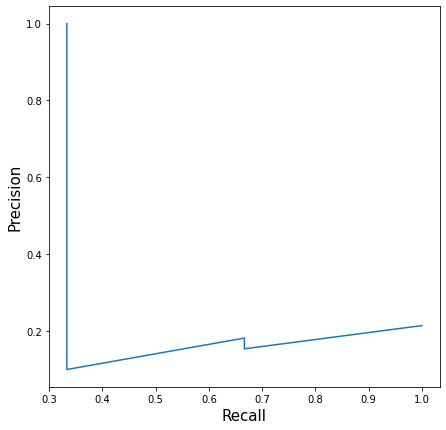

In [36]:
plt.figure(figsize=(7, 7))
plt.plot(recalls, precisions)
plt.xlabel('Recall', fontsize=15)
plt.ylabel('Precision', fontsize=15)

You will notice that *it’s challenging to choose a value of threshold that gives both
good precision and recall values*. If the threshold is too high, you have a smaller
number of true positives and a high number of false negatives. This decreases your
recall; howeverm, your precision score will be high. If you reduce the threshold too
low, false positives will increase a lot, and precision will be less.

**Both precision and recall range from 0 to 1 and a value closer to 1 is better.**

### F1 score

F1 score is a metric that combines both precision and recall. It is defined as a simple
weighted average **(harmonic mean)** of precision and recall. If we denote precision
using P and recall using R, we can represent the F1 score as:

**F1 = 2PR / (P + R)**

A little bit of mathematics will lead you to the following equation of F1 based on
TP, FP and FN

A Python implementation is simple because we have already implemented these.

In [37]:
def f1(y_true, y_pred):
    """
    Function to calculate f1 score
    :param y_true: list of true values
    :param y_pred: list of predicted values
    :return: f1 score
    """
    p = precision(y_true, y_pred)
    r = recall(y_true, y_pred)
    score = 2 * p * r / (p + r)
    return score

Let’s see the results of this and compare it with scikit-learn.

In [38]:
y_true = [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0]

In [39]:
y_pred = [0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0]

In [40]:
f1(y_true, y_pred)

0.5714285714285715

In [41]:
metrics.f1_score(y_true, y_pred)

0.5714285714285715

Instead of looking at precision and recall individually, you can also just look at F1
score. Same as for precision, recall and accuracy, **F1 score also ranges from 0 to 1**,
and a **perfect prediction model has an F1 of 1**. When dealing with datasets that have
skewed targets, we should look at F1 (or precision and recall) instead of accuracy.